## Prevendo doenças cardíacas com Machine Learning - Solução


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df_cardio = pd.read_csv("data/cardio_train.csv", sep=",", index_col=0)

## 1. Análise geral dos dados


| Feature                                       | Variable Type       | Variable    | Value Type                                       |   |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|---|
| Age                                           | Objective Feature   | age         | int (days)                                       |   |
| Height                                        | Objective Feature   | height      | int (cm)                                         |   |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |   |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |   |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |   |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |   |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |   |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |   |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |   |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |   |
| Physical activity                             | Subjective Feature  | active      | binary                                           |   |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |   |


In [3]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


## 2. Análise exploratória dos dados (EDA)


### 2.1. Dados numéricos


In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Box(x=df_cardio["age"] / 365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(
    go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=3, col=1
)
fig.add_trace(
    go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=4, col=1
)

fig.update_layout(height=700)
fig.show()

### Analise de boxplot

O gráfico apresenta boxplots para quatro variáveis numéricas do conjunto de dados: idade, peso, pressão sanguínea sistólica (ap_hi) e pressão sanguínea diastólica (ap_lo). As principais tendências observadas são:

- **Idade**: A maioria dos pacientes está concentrada em uma faixa etária intermediária, com poucos outliers em idades mais baixas ou altas.
- **Peso**: Existe uma variação considerável no peso dos pacientes, com presença de outliers indicando alguns valores extremos.
- **Pressão sistólica (ap_hi)**: Apresenta grande dispersão e muitos outliers, sugerindo possíveis erros de digitação ou medições atípicas.
- **Pressão diastólica (ap_lo)**: Também mostra dispersão relevante e outliers, mas menos acentuada que a sistólica.

De modo geral, os boxplots indicam que as variáveis possuem distribuição assimétrica e presença de valores extremos, especialmente nas medições de pressão arterial. Isso sugere a necessidade de tratamento desses outliers na etapa de preparação dos dados.

### 1.2. Dados categóricos


In [6]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)

fig.add_trace(
    go.Bar(
        y=df_cardio["gender"].value_counts(), x=["Feminino", "Masculino"], name="Genero"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Bar(
        y=df_cardio["cholesterol"].value_counts(),
        x=["Normal", "Acima do Normal", "Muito acima do normal"],
        name="Cholesterol",
    ),
    row=1,
    col=2,
)
fig.add_trace(
    go.Bar(
        y=df_cardio["gluc"].value_counts(),
        x=["Normal", "Acima do Normal", "Muito acima do normal"],
        name="Glicose",
    ),
    row=1,
    col=3,
)
fig.add_trace(
    go.Bar(
        y=df_cardio["smoke"].value_counts(),
        x=["Não fumante", "Fumante"],
        name="Fumante",
    ),
    row=2,
    col=1,
)
fig.add_trace(
    go.Bar(
        y=df_cardio["alco"].value_counts(),
        x=["Não Alcoólatra", "Alcoólatra"],
        name="Alcoólatra",
    ),
    row=2,
    col=2,
)
fig.add_trace(
    go.Bar(
        y=df_cardio["active"].value_counts(), x=["Não Ativo", "Ativo"], name="Ativo"
    ),
    row=2,
    col=3,
)

fig.update_layout(template="plotly_dark", height=700)
fig.show()

### Analise de barras

O gráfico apresenta a distribuição das principais variáveis categóricas do conjunto de dados: gênero, colesterol, glicose, tabagismo, consumo de álcool e atividade física. As principais tendências observadas são:

- **Gênero**: Distribuição equilibrada entre masculino e feminino.
- **Colesterol e Glicose**: A maioria dos pacientes possui níveis normais, mas há uma parcela significativa com valores acima do normal.
- **Tabagismo e Álcool**: A maior parte dos pacientes não fuma nem consome álcool regularmente.
- **Atividade Física**: Predomínio de indivíduos fisicamente ativos.

Esses padrões indicam que, apesar de muitos pacientes apresentarem hábitos saudáveis, existe uma proporção relevante com fatores de risco elevados, como colesterol e glicose alterados.

## 3. Machine Learning


### 3.1. Preparação dos dados


In [8]:
Y = df_cardio["cardio"]
X = df_cardio.loc[:, df_cardio.columns != "cardio"]

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42
)

In [10]:
x_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
64334,91821,21968,2,156,60.0,200,1200,1,1,0,0,1
4550,6439,20280,1,159,60.0,120,80,1,1,0,0,0
24098,34438,20411,2,170,90.0,145,90,2,1,0,0,1
34222,48898,16767,1,160,105.0,130,80,1,1,0,0,0
36016,51423,19933,2,176,94.0,140,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,53137,16001,2,170,75.0,150,80,1,1,1,0,1
6265,8918,23209,2,162,73.0,160,90,1,1,0,0,1
54886,78302,23589,1,169,74.0,120,80,1,1,0,0,1
860,1197,18227,1,167,70.0,120,80,1,1,0,0,0


### 3.2. Treinamento do modelo


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
]

random_florest = RandomForestClassifier(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(
    random_florest, param_grid, cv=5, return_train_score=True, verbose=10, n_jobs=-1
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [12]:
rf_model = grid_search.best_estimator_
rf_model.fit(x_train, y_train)

,n_estimators,30
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
x_test.iloc[0].to_frame().transpose()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46730,66728.0,21770.0,1.0,156.0,64.0,140.0,80.0,2.0,1.0,0.0,0.0,1.0


In [14]:
rf_model.predict_proba(x_test.iloc[0].to_frame().transpose())[0][1] * 100

80.0

In [15]:
predictions = rf_model.predict(x_test)

### 3.3. Avaliação do modelo


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     11506
           1       0.74      0.69      0.71     11594

    accuracy                           0.72     23100
   macro avg       0.72      0.72      0.72     23100
weighted avg       0.72      0.72      0.72     23100

[[8720 2786]
 [3633 7961]]


### 3.4. Feature importance


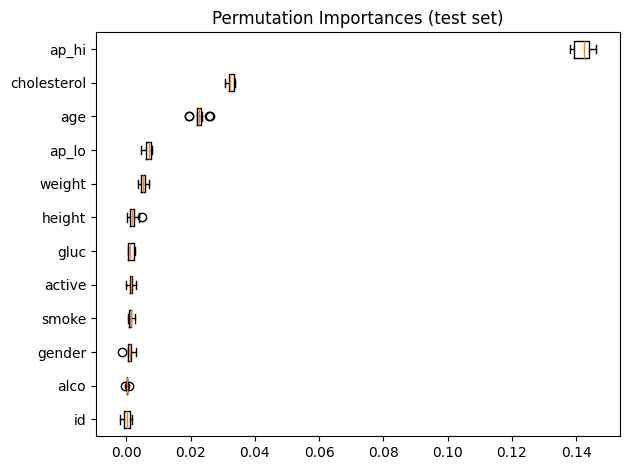

In [17]:
from sklearn.inspection import permutation_importance

plt.style.use("default")

result = permutation_importance(rf_model, x_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### Analise de feature importance
O gráfico de importância das variáveis (feature importance) mostra quais atributos mais influenciam a previsão do modelo. As principais tendências observadas são:

- Algumas variáveis, como pressão arterial, idade e colesterol, apresentam maior importância na predição de doenças cardíacas.
- Variáveis como tabagismo, consumo de álcool e atividade física têm menor influência no resultado do modelo.
- Existe uma variação clara na relevância das variáveis, indicando que nem todas contribuem igualmente para a previsão.

De forma geral, o modelo se apoia principalmente em fatores clínicos (idade, pressão, colesterol) para tomar decisões, enquanto fatores comportamentais têm menor impacto.